In [1]:
import pandas as pd
import time

In [2]:
filename = "NammaMetro_Ridership_Dataset.csv"
df = pd.read_csv(filename, index_col=0)
df.tail()

,Record Date,Total Smart Cards,Stored Value Card,One Day Pass,Three Day Pass,Five Day Pass,Tokens,Total NCMC,Group Ticket,Total QR,QR NammaMetro,QR WhatsApp,QR Paytm
3,29-10-2024,452299,451672,471,115,41,205421,10948,407,182210,53315,94739,34156.0
4,30-10-2024,425759,425115,494,104,46,233366,9975,198,201583,51942,111291,38350.0
5,01-11-2024,113699,112775,855,57,12,189823,2714,406,97700,25978,51723,19999.0
6,02-11-2024,130437,129176,1101,113,47,224349,3004,227,122267,31641,65913,24713.0
7,03-11-2024,131411,130715,595,61,40,248051,3174,283,153605,41775,84027,27803.0


<Axes: title={'center': 'Namma Metro Ridership'}, xlabel='Date', ylabel='Total Riders'>

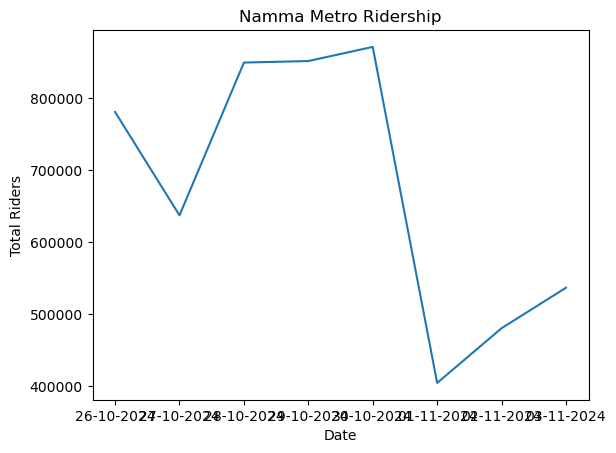

In [3]:
df['Total Riders'] = df.loc[:, ['Total Smart Cards', 'Tokens', 'Total NCMC', 'Group Ticket', 'Total QR']].sum(axis=1)

df.loc[:, ['Record Date', 'Total Riders']].plot(x='Record Date', y='Total Riders', kind='line', title='Namma Metro Ridership', xlabel='Date', ylabel='Total Riders', legend=False)

In [4]:
# Extract just the day from Record Date
df['Day'] = pd.to_datetime(df['Record Date'], format='%d-%m-%Y').dt.day

df.loc[:, ['Record Date', 'Day', 'Total Riders']].tail(10).T

,0,1,2,3,4,5,6,7
Record Date,26-10-2024,27-10-2024,28-10-2024,29-10-2024,30-10-2024,01-11-2024,02-11-2024,03-11-2024
Day,26,27,28,29,30,1,2,3
Total Riders,780578,637048,849136,851285,870881,404342,480284,536524


<Axes: title={'center': 'Namma Metro Daily Ridership Pattern'}, xlabel='Total Riders', ylabel='Day of Month'>

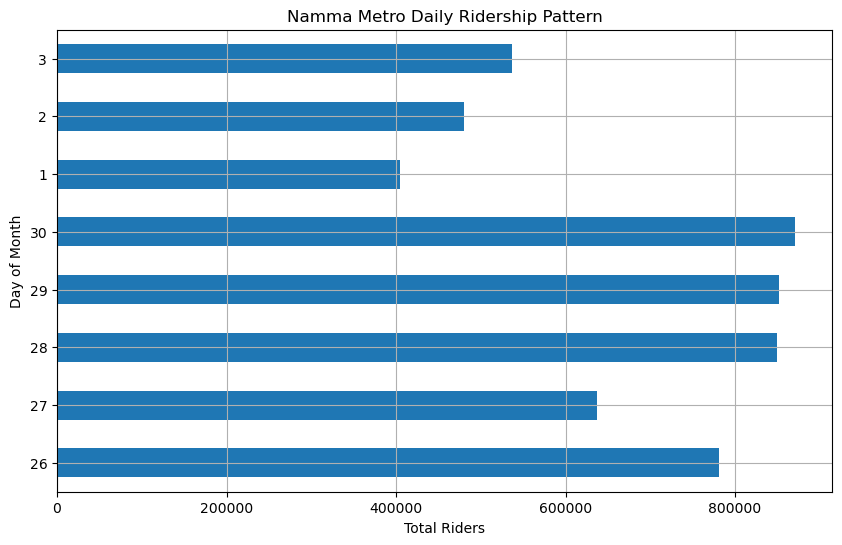

In [5]:
# Create the plot
df.loc[:, ['Day', 'Total Riders']].tail(10).plot(
    x='Day', 
    y='Total Riders', 
    kind='barh', 
    title='Namma Metro Daily Ridership Pattern',
    ylabel='Day of Month', 
    xlabel='Total Riders',
    figsize=(10, 6),
    grid=True,
    legend=False)